In [1]:
# importing libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [3]:
#loadind the data sets
app_data = pd.read_csv('C:/Users/Prakhar/Downloads/upgrad/Credit test/application_data.csv')
app_data.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
prev_data=pd.read_csv("C:/Users/Prakhar/Downloads/upgrad/Credit test/previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
#checking data type of each column

app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

# Missing Values


In [10]:
# percentage of missing values in the application data

round(100*(app_data.isnull().sum() / len(app_data.index)), 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [13]:
#dropping all the columns which has missing value more than 14%
application_df = app_data.drop(app_data.columns[app_data.isnull().mean() >= 0.14], axis = 1)
print(application_df.shape)

(307511, 71)


In [14]:
# percentage of missing values after dropping columns which had more than 14% missing values
round(100*(application_df.isnull().sum() / len(application_df.index)), 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 71, dtype: float64

In [15]:
#list of columns to be dropped as these columns have no significant value for the analysis
li = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']

#dropping the above columns
application_df = application_df.drop(li, axis = 1)
print('Dimension of the data ',application_df.shape)

Dimension of the data  (307511, 40)


In [16]:
# counting the number of rows which has more than 50% columns have missing value
len(application_df[application_df.isnull().sum(axis = 1) > len(application_df.columns) //2].index)

0

In [17]:
# list of columns in the application dataset
print(application_df.columns)
print(application_df.dtypes.value_counts())

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_B

In [18]:
# CODE_GENDER ['M' 'F' 'XNA']. removing rows which has value XNA
application_df = application_df.loc[application_df['CODE_GENDER'] != 'XNA']
application_df.shape

(307507, 40)

# Outliers

In [19]:
# checking the distribution of a subset of continuous variables
round(application_df[['AMT_GOODS_PRICE', 'EXT_SOURCE_2']].describe(), 3)

,AMT_GOODS_PRICE,EXT_SOURCE_2
count,307229.000,306847.000
mean,538397.724,0.514
std,369447.246,0.191
min,40500.000,0.000
25%,238500.000,0.392
50%,450000.000,0.566
75%,679500.000,0.664
max,4050000.000,0.855


In [20]:
# imputing EXT_SOURCE_2 by its mean value
application_df.loc[np.isnan(application_df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = application_df['EXT_SOURCE_2'].mean()

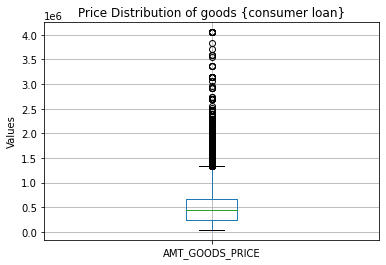

In [23]:
#plotting AMT_GOODS_PRICE to show outliers
ax = application_df.boxplot(column='AMT_GOODS_PRICE')
plt.title('Price Distribution of goods {consumer loan}')
#ax.set_xlabel('Price of Goods')
ax.set_ylabel('Values')
plt.show()

In [24]:
#dropping the rows which contain AMT_GOODS_PRICE NaN values
application_df = application_df[~np.isnan(application_df['AMT_GOODS_PRICE'])]

In [25]:
#removing the rows where the values from multiple columns related to Credit Bureau information is null
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_df = application_df.dropna(axis=0, subset= col)

In [26]:
#Percentage of retained rows
round((application_df.shape[0] / app_data.shape[0])*100,2)

86.42

In [27]:
# another set of continuous variables
round(application_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]))

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH
count,265756.0,265756.0,265745.0,265756.0,265756.0
mean,171309.0,606600.0,27186.0,545040.0,-16117.0
std,248481.0,404836.0,14388.0,371445.0,4309.0
min,26100.0,45000.0,1616.0,40500.0,-25201.0
5%,67500.0,142200.0,9000.0,135000.0,-23198.0
25%,112500.0,272520.0,16636.0,238500.0,-19715.0
50%,157500.0,521280.0,24988.0,450000.0,-15813.0
75%,202500.0,813195.0,34749.0,684000.0,-12569.0
90%,270000.0,1157958.0,45954.0,1125000.0,-10427.0
95%,337500.0,1350000.0,53253.0,1327500.0,-9619.0


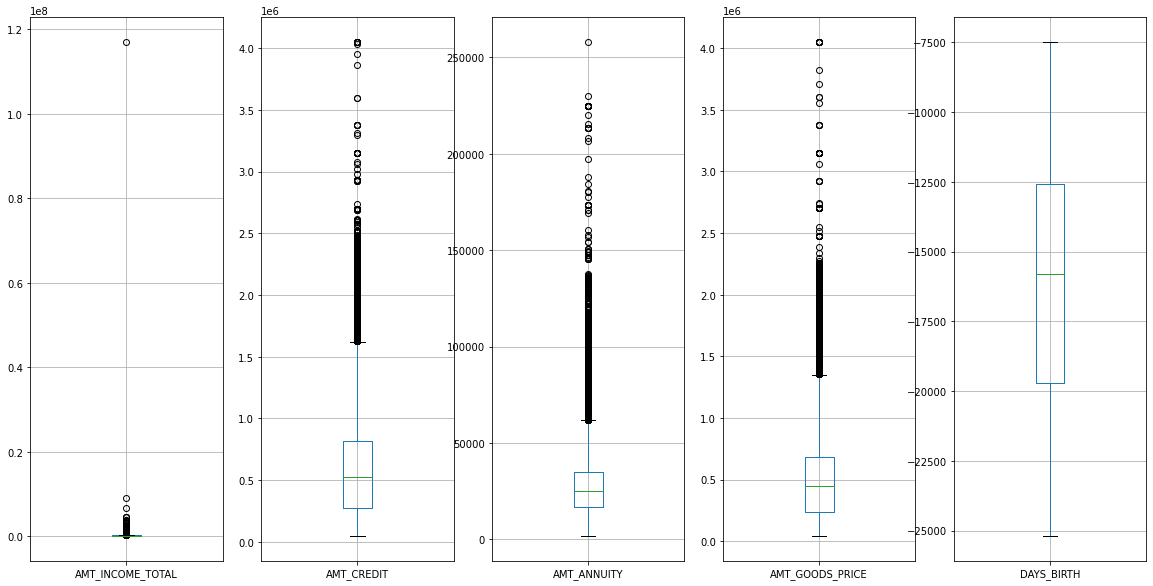

In [28]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    application_df.boxplot(column = col)
plt.show()

In [29]:
# removing outliers using 1.5 IQR method as there is a spike at 100 percentile
for col in cols: 
    q1 = application_df[col].quantile(0.25)
    q3 = application_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    application_df = application_df.loc[(application_df[col] > range_low) & (application_df[col] < range_high)]

In [30]:
#converting DAYS_BIRTH to year
application_df['DAYS_BIRTH'] = abs(application_df['DAYS_BIRTH'] // 365)

In [32]:
print(application_df['AMT_INCOME_TOTAL'].describe())
q25 = application_df['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = application_df['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count    238066.000000
mean     151836.601832
std       61231.305962
min       26100.000000
25%      112500.000000
50%      135000.000000
75%      184500.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 157500.0)

In [33]:
# Creating income category groups
def income_category(value):
    if value <= q25:
        return 'Low'
    elif value > q25 and value <= q60:
        return 'Medium'
    else:
        return 'High'

application_df['INCOME_CATEGORY'] = application_df['AMT_INCOME_TOTAL'].apply(income_category)

In [34]:
# Creating age gategory groups
def age_category(value):
    if value <= 35:
        return 'Young'
    elif value > 35 and value <= 55:
        return 'Mid Age'
    else:
        return 'Old'
application_df['AGE_CATEGORY'] = application_df['DAYS_BIRTH'].apply(age_category)

In [35]:
print(round(application_df['AMT_CREDIT'].describe(), 3))
q50 = application_df['AMT_CREDIT'].quantile(0.5)
q75 = application_df['AMT_CREDIT'].quantile(0.75)

q50,q75

count     238066.000
mean      535481.082
std       318890.920
min        45000.000
25%       270000.000
50%       481495.500
75%       755190.000
max      1597779.000
Name: AMT_CREDIT, dtype: float64


(481495.5, 755190.0)

In [36]:
# creating Credit amount groups
def credit_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['CREDIT_CATEGORY'] = application_df['AMT_CREDIT'].apply(credit_category)

# Imbalance in the Target variable column

In [38]:
# The ratio of the applicants with no payment difficulties (Target = 0) and with payment difficulties (Target = 1)
100*application_df['TARGET'].value_counts(normalize = True)

0    91.979535
1     8.020465
Name: TARGET, dtype: float64

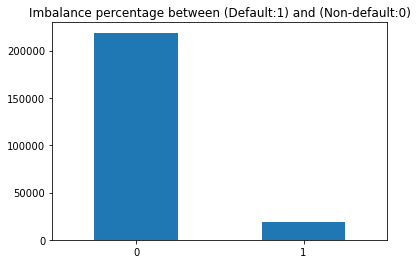

In [39]:
# graphical analysis of the share
application_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance percentage between (Default:1) and (Non-default:0)')
plt.xticks(rotation = 0)
plt.show()

There is a large imbalance between the proportion of default (TARGET = 1) and non-default (TARGET = 0) in the dataset. The ratio of non-deafult to default is 11.4:1. Even if the default ratio is low, default of any application is costly and should be analyzed closely

# EDA

In [41]:
#creating dataframe with TARGET = 1 (payment defaulted)
app_target_default = application_df.loc[application_df['TARGET'] == 1]
print('Dimension of the default dataset',app_target_default.shape)
display(app_target_default.head())

print(                           )
#creating dataframe with TARGET = 0 (payment not defaulted)
app_target_nondefault = application_df.loc[application_df['TARGET'] == 0]
print('Dimension of the non-default dataset',app_target_nondefault.shape)
display(app_target_nondefault.head())

Dimension of the default dataset (19094, 43)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,Young,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,Mid Age,High
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,High,Mid Age,High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,Medium,Mid Age,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Old,Low



Dimension of the non-default dataset (218972, 43)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Age,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,Mid Age,Medium
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Old,High


### Contract Type

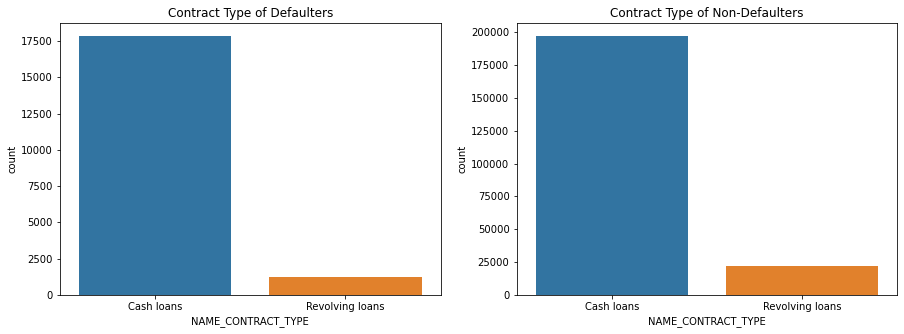

In [42]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_default)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_nondefault)
plt.title('Contract Type of Non-Defaulters')

plt.show()

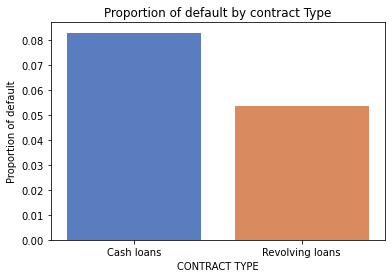

In [43]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_CONTRACT_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_CONTRACT_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_CONTRACT_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('CONTRACT TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Inference: Number of Cash loans are higher in both default/ non-default cases than Revolving loans. The proportion of default is higher in cash loan category compared to the revolving loans



#### Gender

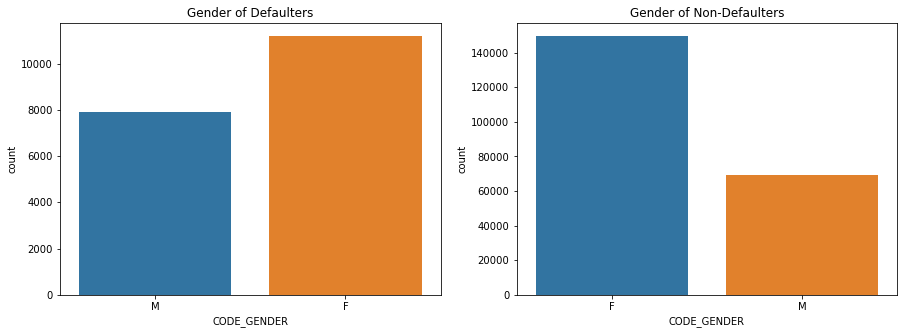

In [44]:
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = app_target_default)
plt.title('Gender of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = app_target_nondefault)
plt.title('Gender of Non-Defaulters')

plt.show()

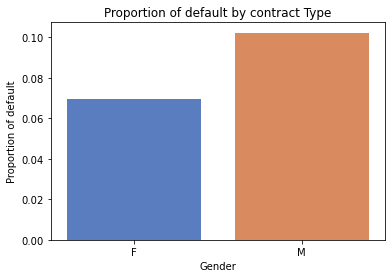

In [45]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['CODE_GENDER'])['TARGET'].value_counts()/application_df.groupby(['CODE_GENDER'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['CODE_GENDER'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['CODE_GENDER','Non-default']
ax2 = sns.barplot(x='CODE_GENDER', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Inference: Number of Female clients are more in both the cases default/non-default. And the proportion of default is lower among female applicants than that of the male.



### Car Owners

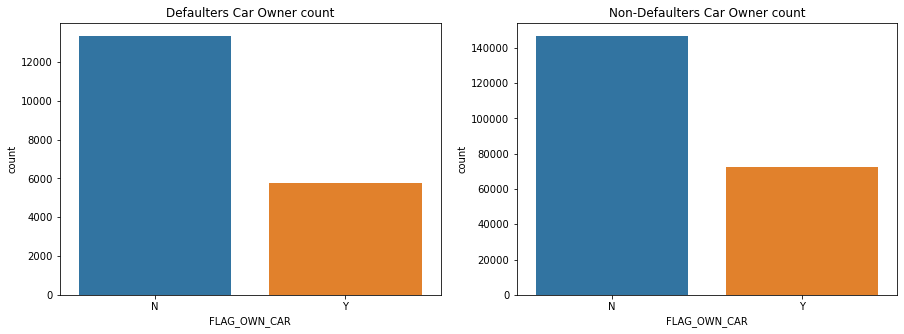

In [47]:
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_default)
plt.title('Defaulters Car Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_nondefault)
plt.title('Non-Defaulters Car Owner count')

plt.show()

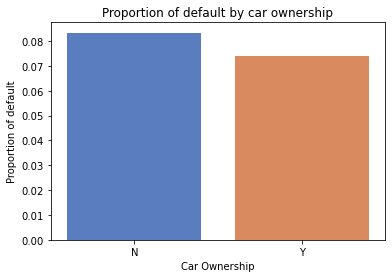

In [48]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_CAR'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_CAR','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_CAR', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Car Ownership')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by car ownership')
plt.show()

Inference: Defalut/Non-default both the cases, the count of client who do not own car is higher than who owns a car. The proportion of default is higher for non-car owners relative to the car owners.


### Realty Owners

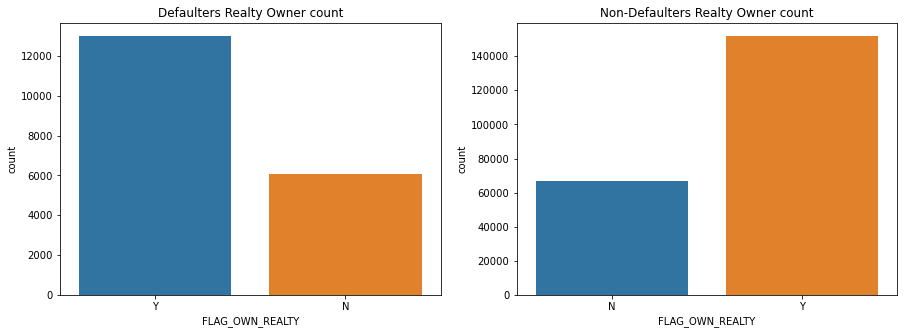

In [50]:
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_default)
plt.title('Defaulters Realty Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_nondefault)
plt.title('Non-Defaulters Realty Owner count')

plt.show()

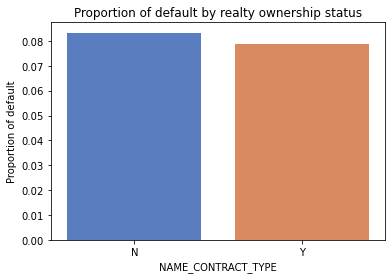

In [51]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_REALTY'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_REALTY','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_REALTY', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by realty ownership status')
plt.show()

Inference: Defalut/Non-default both the cases, the count of client who do own real estate is higher than who has not. Applicants with no realty ownership has a higher propensity to default than the clients who own real estate.



### Income Type


In [52]:
display(pd.DataFrame(app_target_default['NAME_INCOME_TYPE'].value_counts()))
display(pd.DataFrame(app_target_nondefault['NAME_INCOME_TYPE'].value_counts()))

,NAME_INCOME_TYPE
Working,11838
Commercial associate,3924
Pensioner,2338
State servant,994


,NAME_INCOME_TYPE
Working,113560
Commercial associate,47279
Pensioner,42339
State servant,15774
Student,13
Unemployed,4
Businessman,2
Maternity leave,1


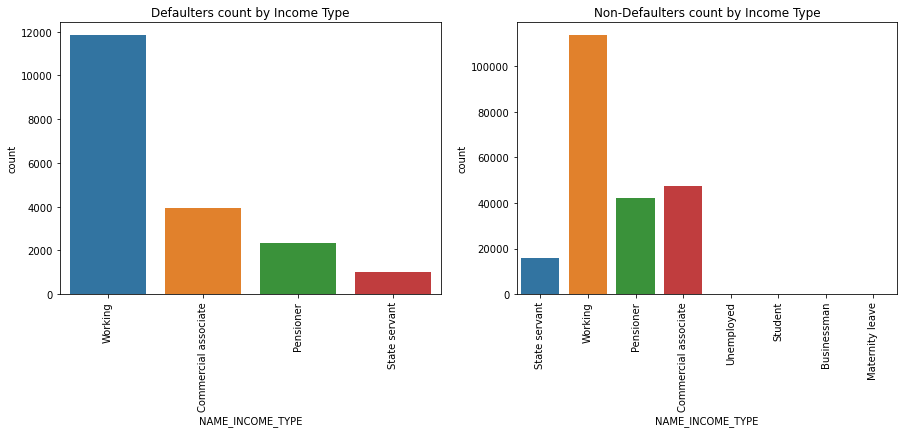

In [53]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

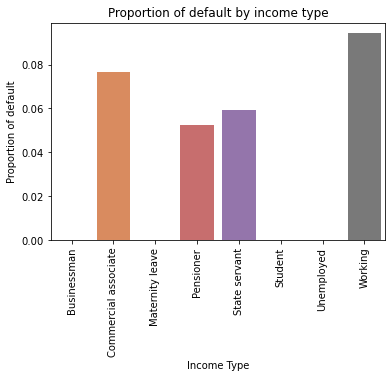

In [54]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_INCOME_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_INCOME_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_INCOME_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by income type')
plt.xticks(rotation = 90)
plt.show()

Inference: Majority of the applicants are from working, commercial associate, pensioners and state servants. The remaining categories of income types are very small. The proportion of default is high among the working and the commercial associates. It is relatively lower for the pensioner and state servant.

### Education

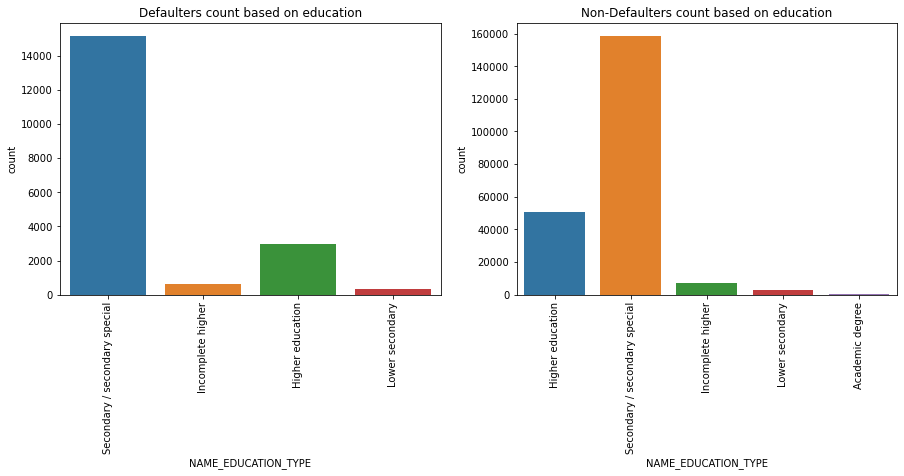

In [55]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

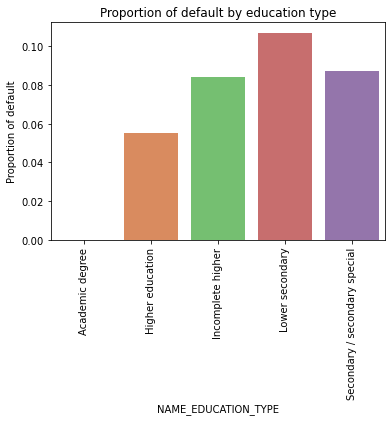

In [56]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_EDUCATION_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_EDUCATION_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_EDUCATION_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by education type')
plt.xticks(rotation = 90)
plt.show()

Inference: Applicants with secondary and higher secondary education are among the highest defaulters as well as not defaulters. Whereas, applicants with academic degrees are the smallest group of applicants that have applied for the loan and applicants from this background has no recorded of default. From the above figure, we see that a distinct pattern emerges. The chances of default is lower as the education level of the applicants increases.



### Family

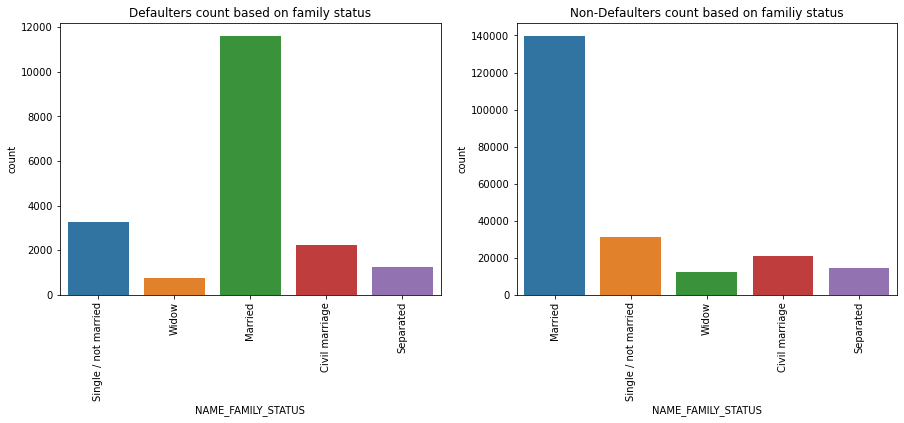

In [57]:
# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on family status')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on familiy status')

plt.show()

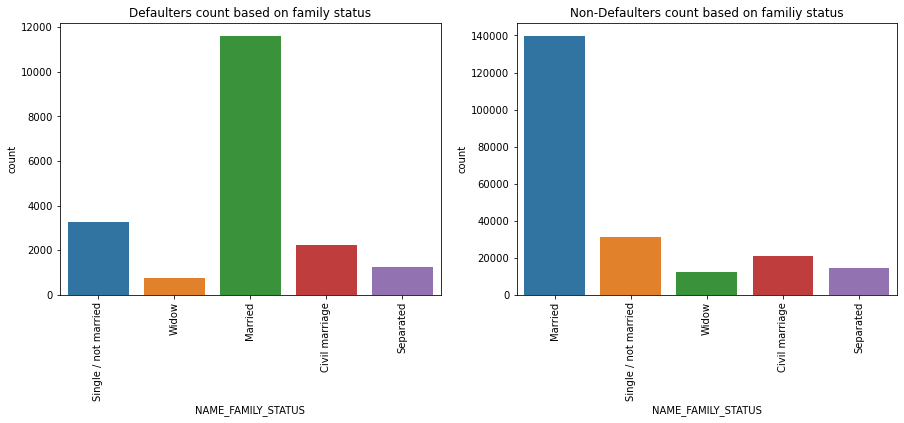

In [58]:
# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on family status')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on familiy status')

plt.show()

Inference: Applicants who are married are among the highest number of defaulters and non-defaulters. Whereas, widows are the lowest number of defaulters and non-defaulters. The proportion of default is the highest among the applicants who are in civil marriage category followed by applicants who are single.



#### Spatial Effect

In [59]:
col = ['SK_ID_CURR', 'TARGET','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']
livework_df = application_df[col]
livework_df.head() 

,SK_ID_CURR,TARGET,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,0
1,100003,0,0,0
2,100004,0,0,0
4,100007,0,0,1
5,100008,0,0,0


In [60]:
display(pd.DataFrame(livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].value_counts()))
display(pd.DataFrame(livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].value_counts()))

TARGET
LIVE_REGION_NOT_WORK_REGION TARGET        
0                           0       211495
                            1        18367
1                           0         7477
                            1          727

TARGET
LIVE_CITY_NOT_WORK_CITY TARGET        
0                       0       180824
                        1        14898
1                       0        38148
                        1         4196

In [61]:
# live and work by region
c = pd.DataFrame(livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].value_counts()/livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_livework_region = pd.pivot_table(c, values ='Per_Target', index =['LIVE_REGION_NOT_WORK_REGION'], 
                         columns =['TARGET'], aggfunc = np.sum) 
target_by_livework_region.drop(0, axis = 1, inplace = True)
#target_by_livework_region = target_by_livework_region.reset_index('LIVE_REGION_NOT_WORK_REGION')
target_by_livework_region

TARGET,1
LIVE_REGION_NOT_WORK_REGION,
0,0.079904
1,0.088615


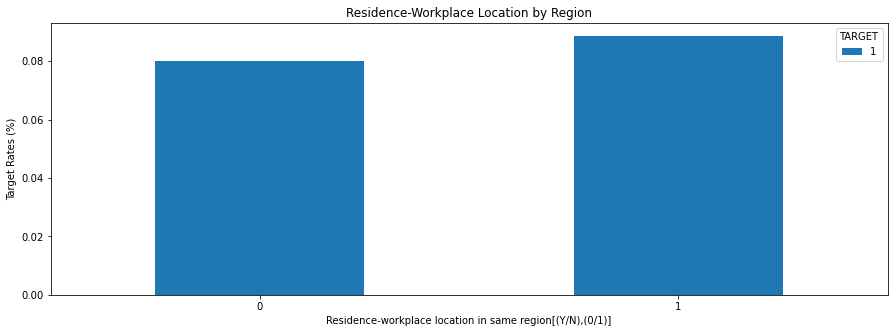

In [62]:
# figure
ax = target_by_livework_region.plot(
    kind='bar',
    grid= False,
    figsize=(15, 5),
    title='Residence-Workplace Location by Region'
)

ax.set_xlabel("Residence-workplace location in same region[(Y/N),(0/1)]")
ax.set_ylabel('Target Rates (%)')
plt.xticks(rotation = 0)

plt.show()

In [63]:
# live and work by region
c = pd.DataFrame(livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].value_counts()/livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_livework_city = pd.pivot_table(c, values ='Per_Target', index =['LIVE_CITY_NOT_WORK_CITY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
target_by_livework_city.drop(0, axis = 1, inplace = True)
target_by_livework_city.head()

TARGET,1
LIVE_CITY_NOT_WORK_CITY,
0,0.076118
1,0.099093


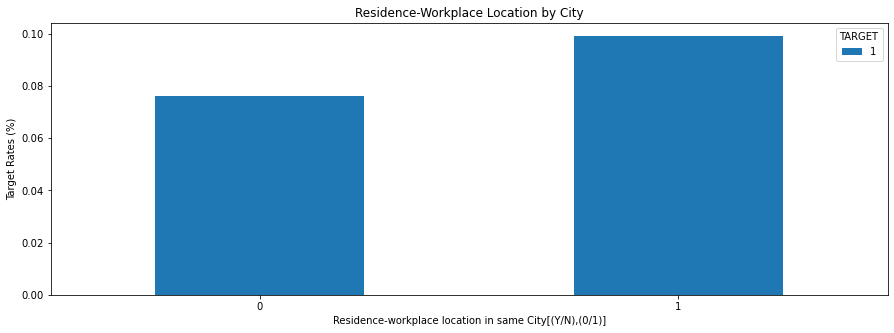

In [65]:
# figure
ax = target_by_livework_city.plot(
    kind='bar',
    grid= False,
    figsize=(15, 5),
    title='Residence-Workplace Location by City'
)

ax.set_xlabel("Residence-workplace location in same City[(Y/N),(0/1)]")
ax.set_ylabel('Target Rates (%)')
plt.xticks(rotation = 0)

plt.show()

Inference: Most of the applicants live and work in the same city/region. And applicants who doesn't live and work in the same city/region has the higher chances of default.



### Univariate analysis on continuous columns


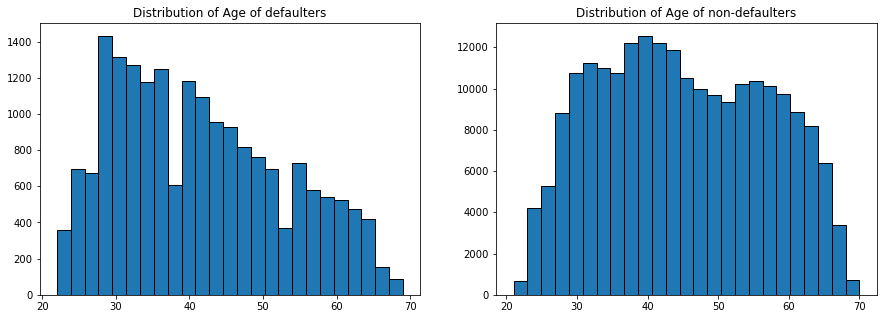

In [66]:
#plotting age 'DAYS_BIRTH' histogram
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_default['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of defaulters')
plt.subplot(1,2,2)
plt.hist(app_target_nondefault['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of non-defaulters')

plt.show()

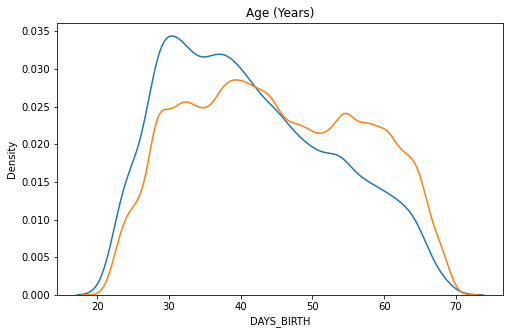

In [67]:
#plotting kde plot of 'DAYS_BIRTH'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['DAYS_BIRTH'], label = 'default')
sns.kdeplot(app_target_nondefault['DAYS_BIRTH'], label = 'non-default')
plt.title(r'Age (Years)')
plt.show()

Inference: Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people. Non-defaulted people are almost equally distributed.



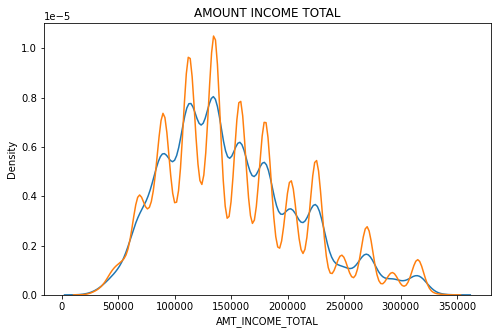

In [68]:
#plotting kde plot of 'AMT_INCOME_TOTAL'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_INCOME_TOTAL'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_INCOME_TOTAL'], label = 'non-default')
plt.title('AMOUNT INCOME TOTAL')
plt.show()

Inference: There are interesting patterns in both the default and non-default people with respect to Income Total. From Rs75,000/- to Rs2,00,000/- income has some spikes and then higher the income, the lesser spike we can see for default people. However, the pattern is same for both the default and non-default. The frequency range of non-default people is larger than default.



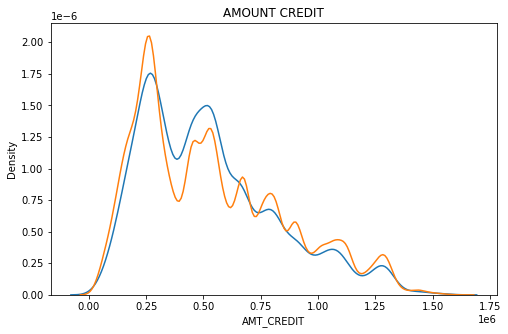

In [69]:
#plotting kde plot of 'AMT_CREDIT'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_CREDIT'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_CREDIT'], label = 'non-default')
plt.title('AMOUNT CREDIT')
plt.show()

Inference:  Here, we can see that the lesser loan credit amount, the higher the default chances. We can do bivariate analysis with Occupation Type to find out more insight.



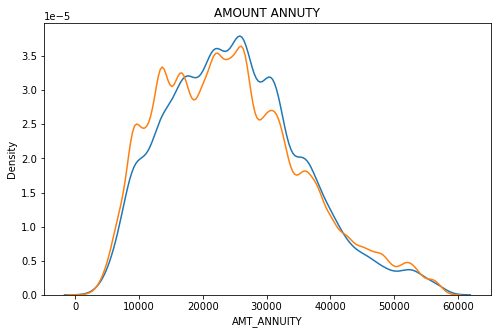

In [70]:
#plotting kde plot of 'AMT_ANNUITY'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_ANNUITY'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_ANNUITY'], label = 'non-default')
plt.title('AMOUNT ANNUTY')
plt.show()

Inference: Here also we can see the same pattern in both the default and non-default. The loan annuty is mostly concentrated within Rs10,000/- to Rs40,000/- range in both the cases.



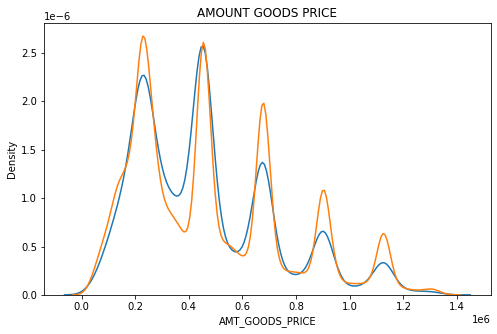

In [71]:
#plotting kde plot of 'AMT_GOODS_PRICE'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_GOODS_PRICE'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_GOODS_PRICE'], label = 'non-default')
plt.title('AMOUNT GOODS PRICE')
plt.show()

Inference: Here also we can see an interesting pattern. Both the curves are following the similar frequency distribution. We can see some spikes from Rs1,50,000/- to Rs2,20,000/-, then around 500000 price. At this range people are more defaulted and higher the goods price, people are becoming the less defaulted. We can infer that, rich people are buying costly product and thus they are becoming less defaulted.



## Segmented univariate analysis


### Age and Income Category Segmented two variables


In [72]:
# target by days birth
c = pd.DataFrame(application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_ageinc = pd.pivot_table(c, values ='Per_Target', index =['AGE_CATEGORY','INCOME_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_ageinc.drop(0, axis = 1, inplace = True)

target_by_ageinc1 = pd.pivot_table(target_by_ageinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['AGE_CATEGORY'], aggfunc = np.sum) 

target_by_ageinc1

AGE_CATEGORY,Mid Age,Old,Young
INCOME_CATEGORY,,,
High,0.078309,0.051390,0.095450
Low,0.077878,0.049041,0.117599
Medium,0.081346,0.052102,0.112219


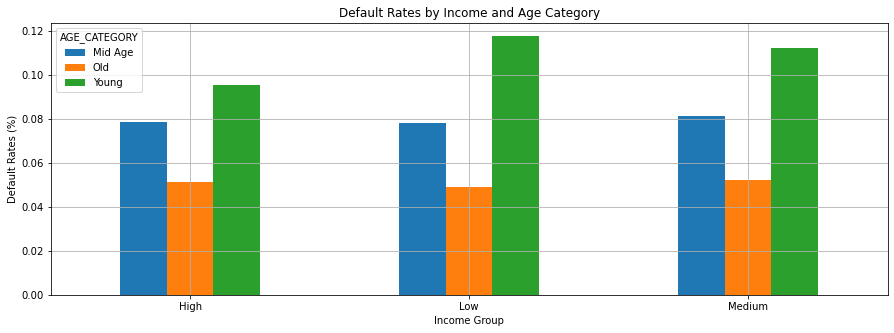

In [74]:
# figure
ax = target_by_ageinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Age Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

Inference: The chances of default decreases as the age of the applicants increases.



### Income and Credit amount category two segmented

In [76]:
# target
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_creditinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','CREDIT_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_creditinc.drop(0, axis = 1, inplace = True)

target_by_creditinc1 = pd.pivot_table(target_by_creditinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['CREDIT_CATEGORY'], aggfunc = np.sum) 

target_by_creditinc1

CREDIT_CATEGORY,High,Low,Medium
INCOME_CATEGORY,,,
High,0.066620,0.079133,0.090581
Low,0.070522,0.079001,0.085472
Medium,0.070425,0.084605,0.094747


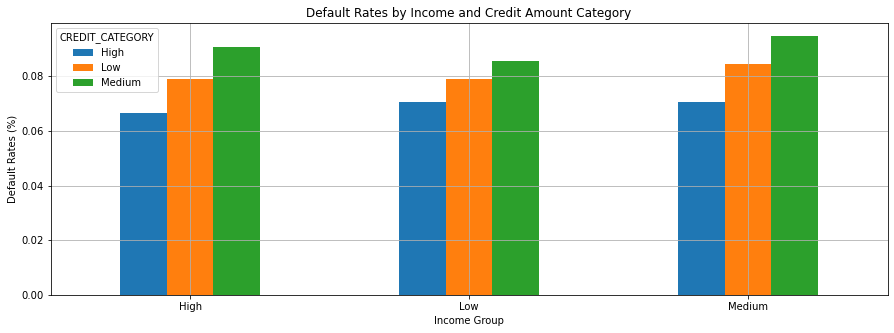

In [77]:
# figure
ax = target_by_creditinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Credit Amount Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

Inference: From the above plot, we find that irrespective of the income group, the chances of default increases as the credit amount increases. Also if we compare credit amount categories by different income groups, then the default rates for all the three credit amount categories are lower in the high income group relative to the medium and low income groups.



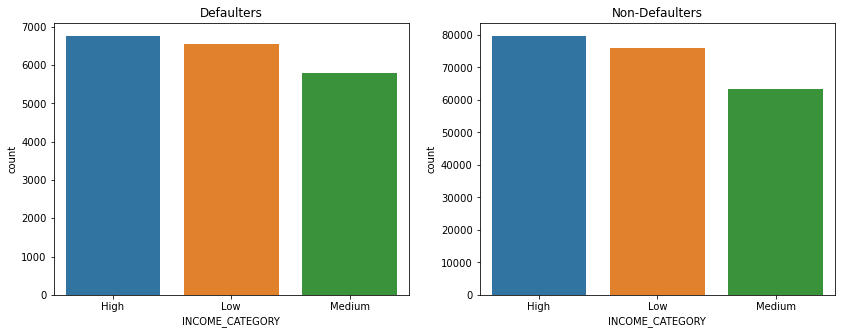

In [78]:
#plotting count plot on INCOME CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Inference: Low income group has more defaulter followed by high income group.



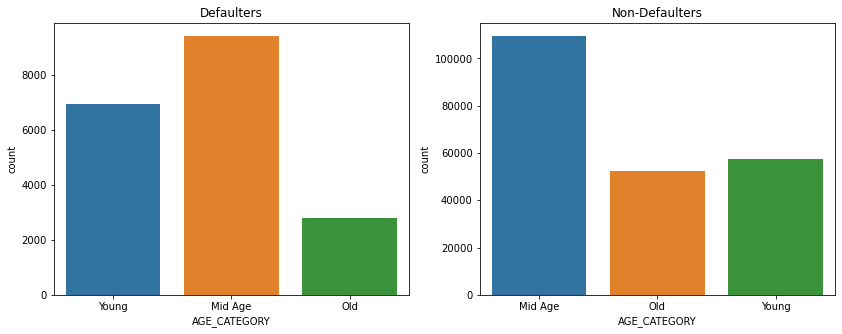

In [79]:
#plotting count plot on AGE_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Inference: Mid age (35-55) age group of people are more likely to be defaulted followed by the young people.



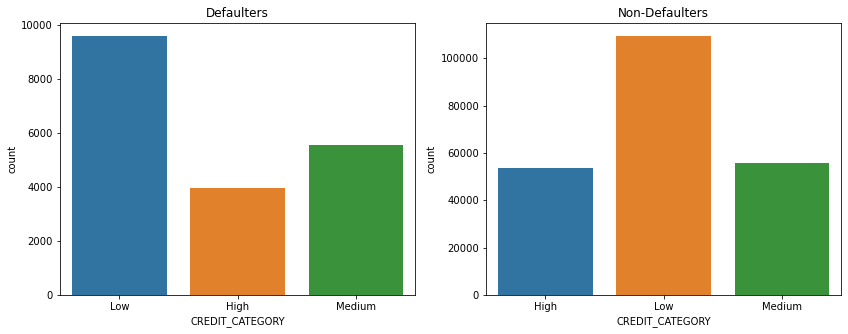

In [80]:
#plotting count plot on CREDIT_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Inference: Low category of loan amount credited people are more likely to be defaulted than high amount loan credit.



### Education Status Vs Gender wise defaulters



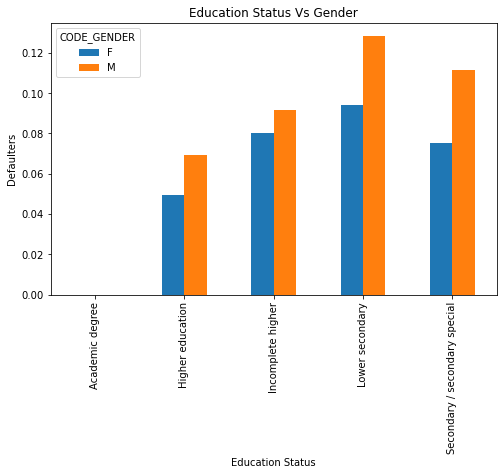

In [82]:
application_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('Defaulters')
plt.title('Education Status Vs Gender')
plt.show()


Inference: Male with lower secondary education are more defaulted followed by Seconday/secondary special education.



### Age Group Vs Gender



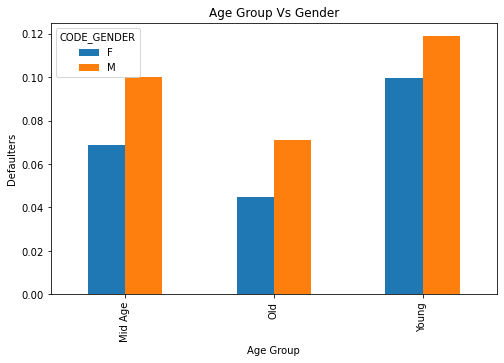

In [83]:
application_df.pivot_table(values='TARGET',index='AGE_CATEGORY',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Age Group')
plt.ylabel('Defaulters')
plt.title('Age Group Vs Gender')
plt.show()

Inference: Young male clients are more likely to be defaulters



## Bivariate analysis


#### Correlation of the continuous variables of Defaulter data frame



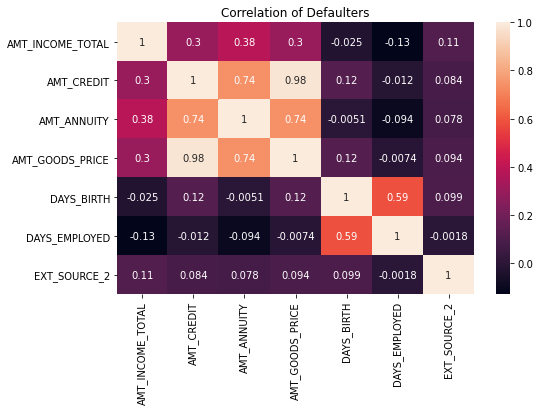

In [84]:
# plotting heatmap where TARGET = 1
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2']
cor = app_target_default[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Defaulters')
plt.show()

Inference: We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are highly correlated. External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.



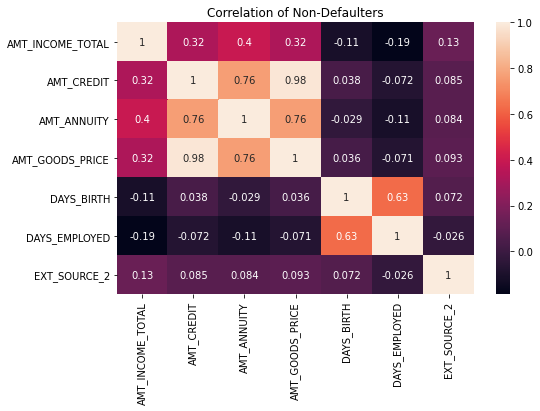

In [85]:
# Correlation of the continuous variables of Non-Defaulter data frame

# plotting heatmap where TARGET = 0
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2']
cor = app_target_nondefault[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Non-Defaulters')
plt.show()

Inference: We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are mederately correlated with each other. External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.



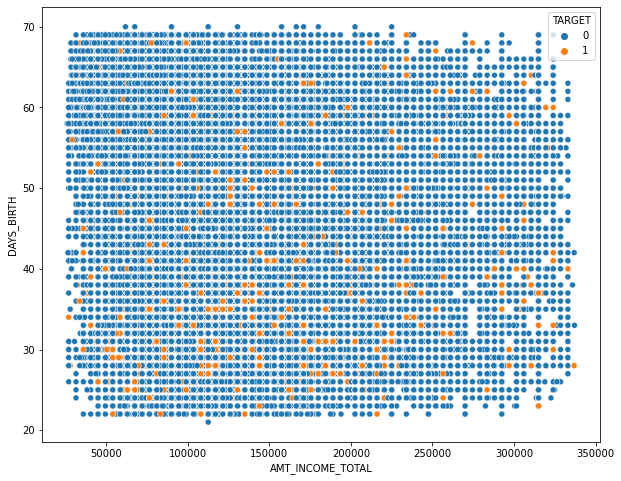

In [86]:
#plotting for AGE and INCOME TOTAL
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_INCOME_TOTAL', 'DAYS_BIRTH', hue='TARGET', data = application_df)
plt.show()

#### Loan Credit amount and Rating



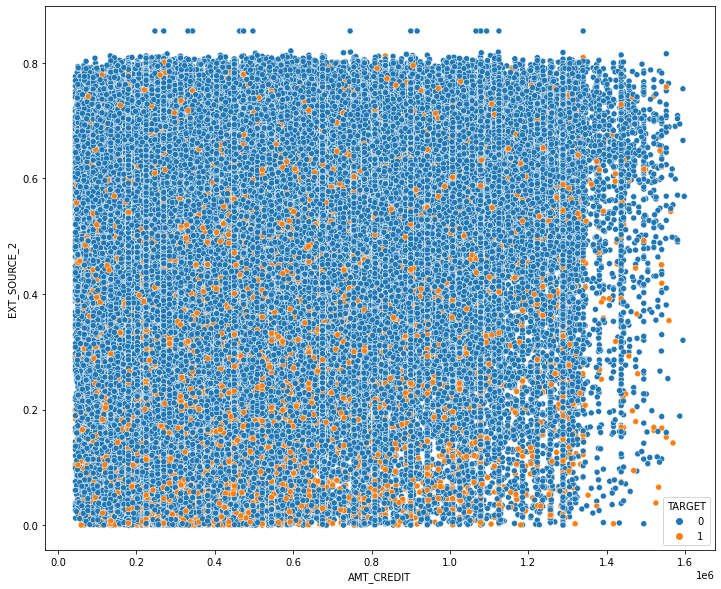

In [87]:
#plotting for CREDIT and EXT Rating
plt.figure(figsize = (12,10))
sns.scatterplot('AMT_CREDIT', 'EXT_SOURCE_2', hue='TARGET', data = application_df)
plt.show()

Inference: From the above plot, we cannot get much insight as the data is scattered across the plot. However, we can see some concentration of defaulters near the low rating region between 0.0 to 3.0.




### Analysis on Categorical Column

In [91]:
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY']

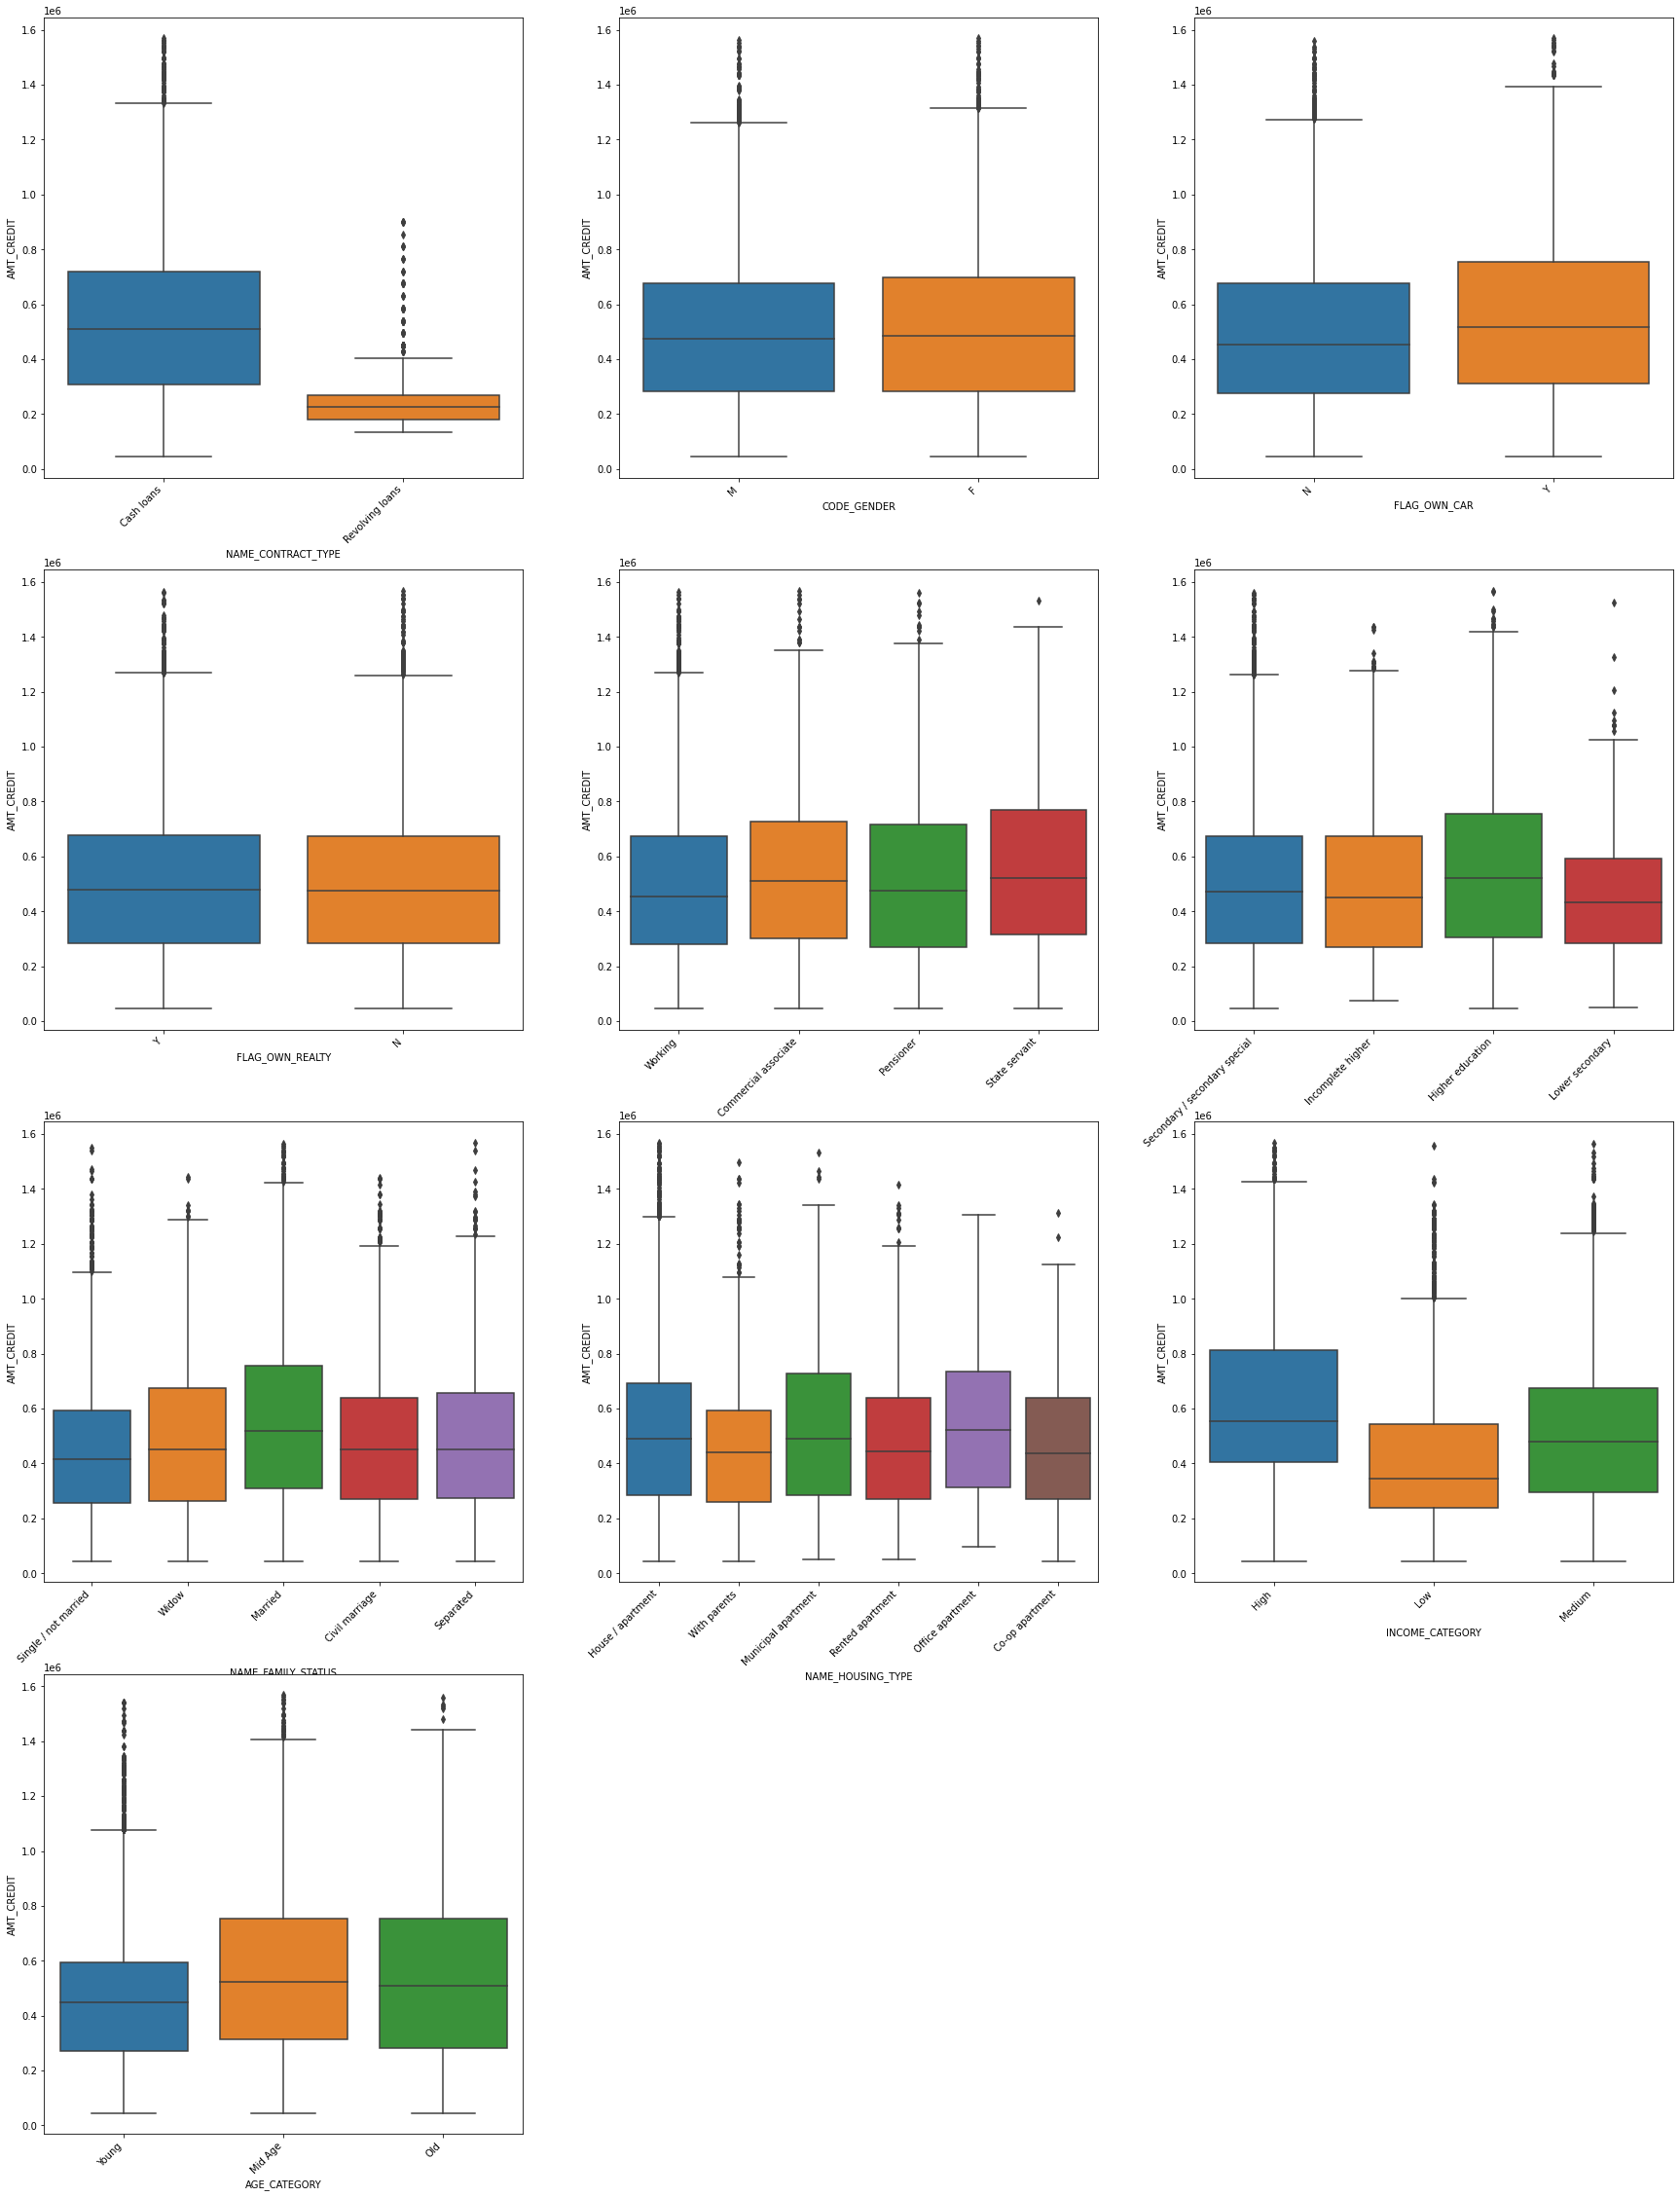

In [92]:
# plotting for Defaulters
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_default)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Inference
- Cash loans are more credited.
- Those who are female and own car they got little more number of loans
- State servent got more number of loans
- Higher education got more loans
- Married people got more number of loans
- Clients who are living in municipal apartment, got more number of loans
- High income group people got more loans.

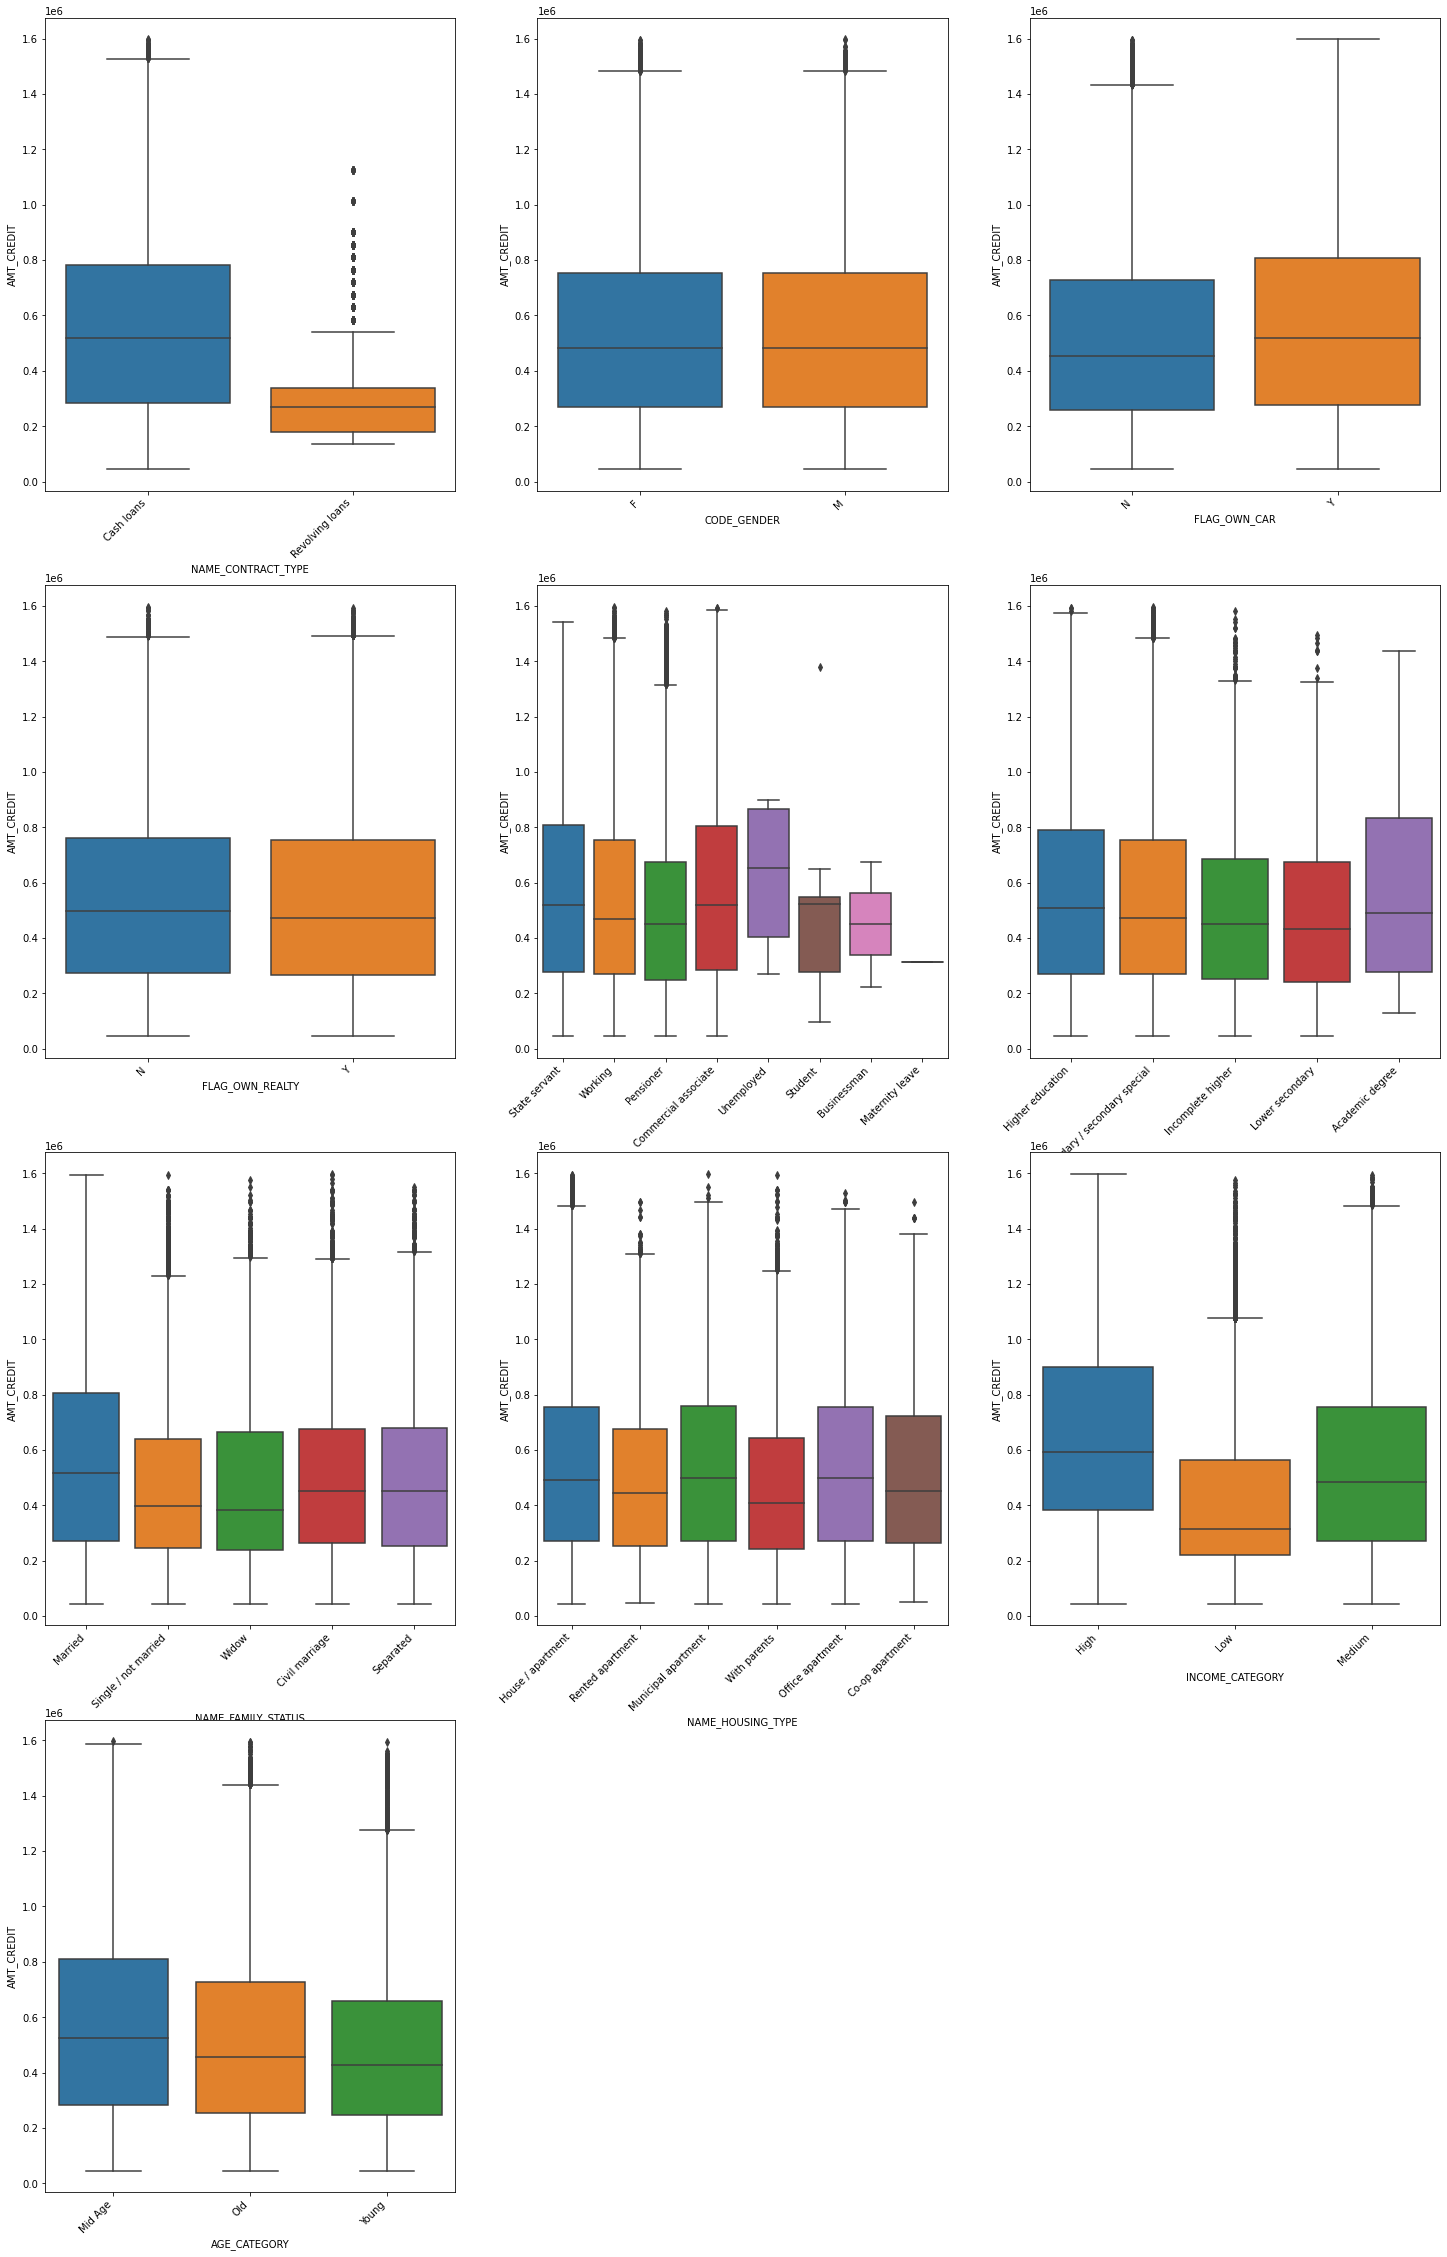

In [93]:
plt.figure(figsize=(25,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_nondefault)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Inference: 
- Cash loans are more credited.
- Those who are female and own car they got little more number of loans
- State servent got more number of loans
- Higher education got more loans
- Married people got more number of loans
- Clients who are living in municipal apartment, got more number of loans
- High income group people got more loans.
- Mid age people have more loans.

# Previous Application Analysis

In [98]:
prev_data.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data Quality Check

In [99]:
prev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
#checking for unique values in each columns
for col in prev_data.columns:
    print(col)
    print('------------------')
    print(prev_data[col].unique())

SK_ID_PREV
------------------
[2030495 2802425 2523466 ... 2659632 2785582 2418762]
SK_ID_CURR
------------------
[271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE
------------------
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY
------------------
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT
------------------
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_DOWN_PAYMENT
------------------
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
AMT_GOODS_PRICE
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
WEEKDAY_APPR_PROCESS_START
------------------
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START
------------------
[15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]
FLAG_LAST_APPL_PE

In [101]:
prev_data.replace('XNA',np.nan,inplace=True)
prev_data.replace('XAP',np.nan,inplace=True)

In [102]:
#checking for missing value perventage columns wise
round(100*(prev_data.isnull().sum() / len(prev_data.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### Adjusting missing values

In [103]:
#dropping all the columns which has missing value more than 30%
previous_df = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.3], axis = 1)

In [104]:
# dropping columns whicha are not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

previous_df = previous_df.drop(cols_to_be_deleted, axis = 1)

In [105]:
#checking for missing value percentage row wise if 50% columns have missing values
len(previous_df[round(100*(previous_df.isnull().sum(axis = 1) / len(previous_df.columns)),2) >= 50].index)

0

In [107]:
#checking number of rows have where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values
print(len(previous_df[np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT'])].index))


333855


In [108]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
previous_df = previous_df[~(np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT']))]
previous_df.shape

(1336359, 13)

In [109]:
#checking for missing value perventage columns wise after removing the rows
round(100*(previous_df.isnull().sum() / len(previous_df.index)),2)

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
CNT_PAYMENT             2.87
dtype: float64

In [110]:
round(previous_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)


,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.000,1284699.000,1297984.000
mean,15955.121,227847.279,16.054
std,14782.137,315396.558,14.567
min,0.000,0.000,0.000
5%,2726.595,22882.500,0.000
25%,6321.780,50841.000,6.000
50%,11250.000,112320.000,12.000
75%,20658.420,234000.000,24.000
90%,34703.820,585000.000,36.000
95%,45336.780,900000.000,48.000


### Checking Outliers

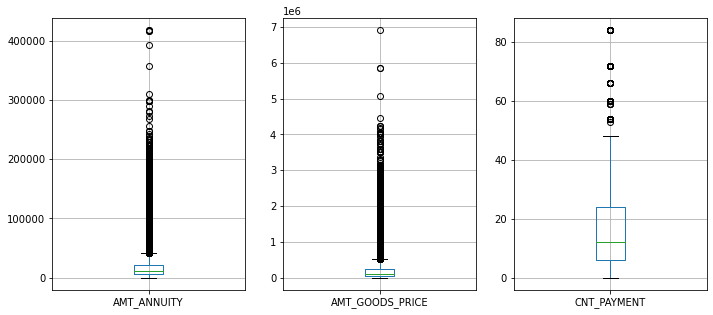

In [111]:
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    previous_df.boxplot(column = col)
plt.show()

In [112]:
# removing outliers using 1.5 IQR method
for col in cols: 
    q1 = previous_df[col].quantile(0.25)
    q3 = previous_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    previous_df = previous_df.loc[(previous_df[col] > range_low) & (previous_df[col] < range_high)]

In [113]:
# %age of data lost
100 * ((prev_data.shape[0] - previous_df.shape[0]) / prev_data.shape[0])


40.129827674777005

In [114]:
# converting all DAYS columns to month columns
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'] // 30)

In [115]:
previous_df.dtypes


SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
CNT_PAYMENT             float64
dtype: object

In [116]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_CATEGORY','AGE_CATEGORY','CREDIT_CATEGORY', 'DAYS_BIRTH']
application_sub = application_df[cols]
application_sub.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY,DAYS_BIRTH
0,100002,1,M,Secondary / secondary special,Single / not married,High,Young,Low,26
1,100003,0,F,Higher education,Married,High,Mid Age,High,46
2,100004,0,M,Secondary / secondary special,Single / not married,Low,Mid Age,Low,53
4,100007,0,M,Secondary / secondary special,Single / not married,Medium,Mid Age,Medium,55
5,100008,0,M,Secondary / secondary special,Married,Low,Mid Age,Medium,47


## Merging previous application data with application data 


In [117]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(previous_df,application_sub, on='SK_ID_CURR', how='left')
merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,...,CHANNEL_TYPE,CNT_PAYMENT,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY,DAYS_BIRTH
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,3,Repeater,...,Country-wide,12.0,0.0,F,Incomplete higher,Married,High,Mid Age,Medium,40.0
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,11,Repeater,...,Credit and cash offices,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,27,Repeater,...,Credit and cash offices,24.0,0.0,F,Secondary / secondary special,Married,High,Young,Medium,28.0
3,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Approved,23,Repeater,...,Credit and cash offices,18.0,0.0,M,Secondary / secondary special,Civil marriage,Medium,Old,High,58.0
4,2257824,161140,Cash loans,13832.775,211500.0,246397.5,211500.0,Approved,28,Repeater,...,Credit and cash offices,30.0,0.0,F,Secondary / secondary special,Separated,Medium,Old,Low,64.0


In [118]:
#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]

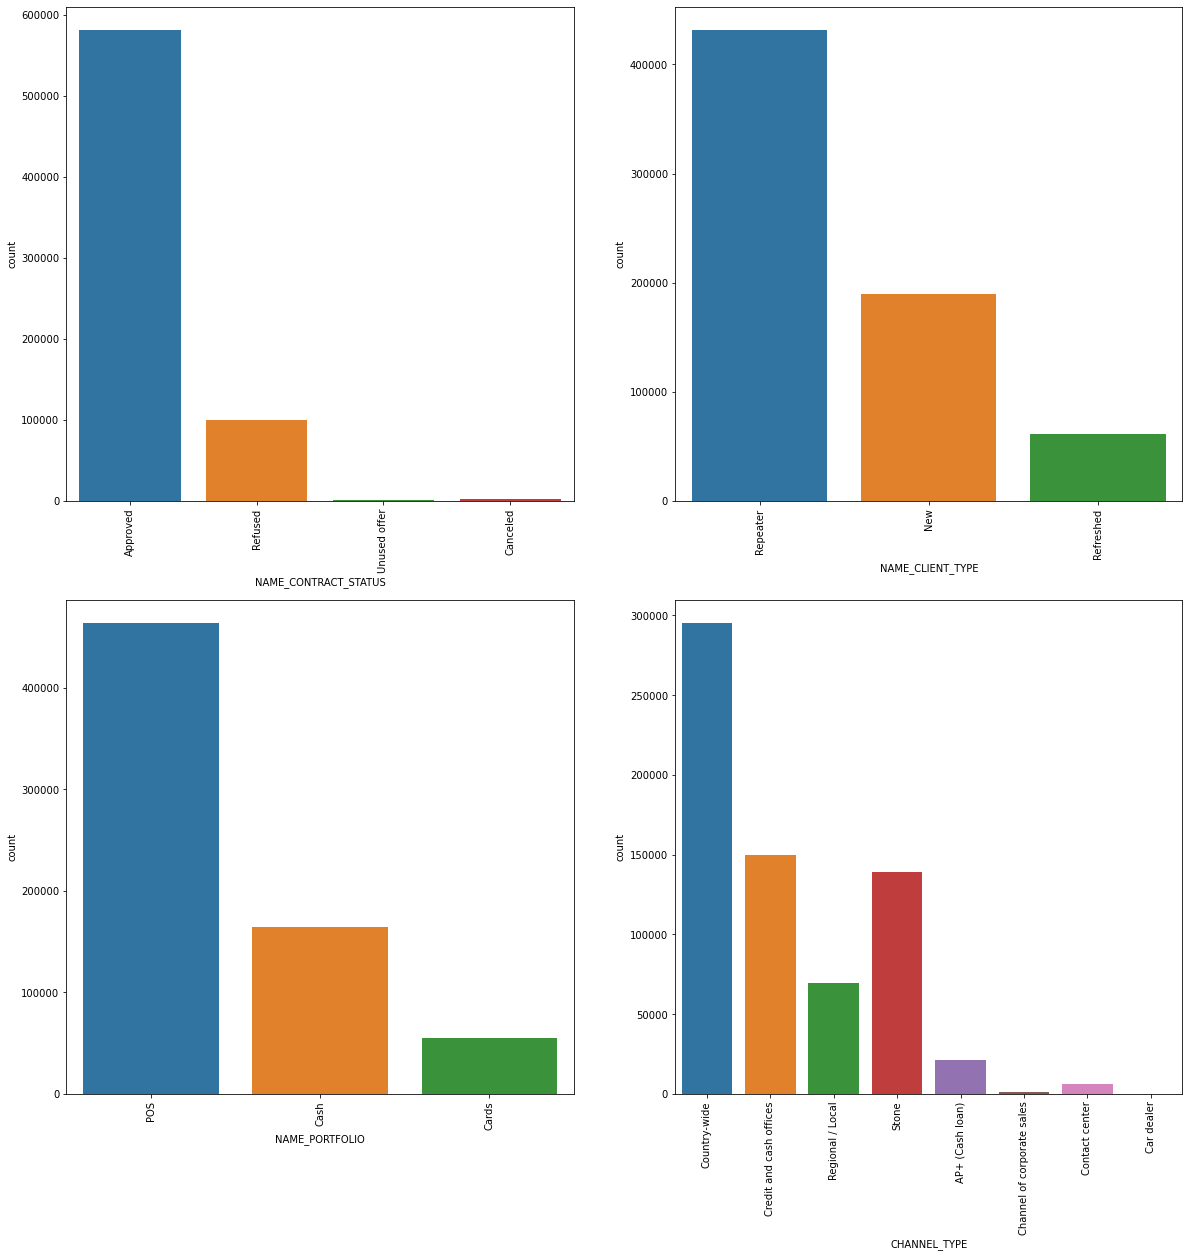

In [119]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

Inference-
- Approved loan status is huge than rejected or canceled.
- Repeater clients are highest in number than new client.
- POS loans are highest rather than cash loans.
- Country-wide channel type is the most used channel followed by Credit and cash offers.

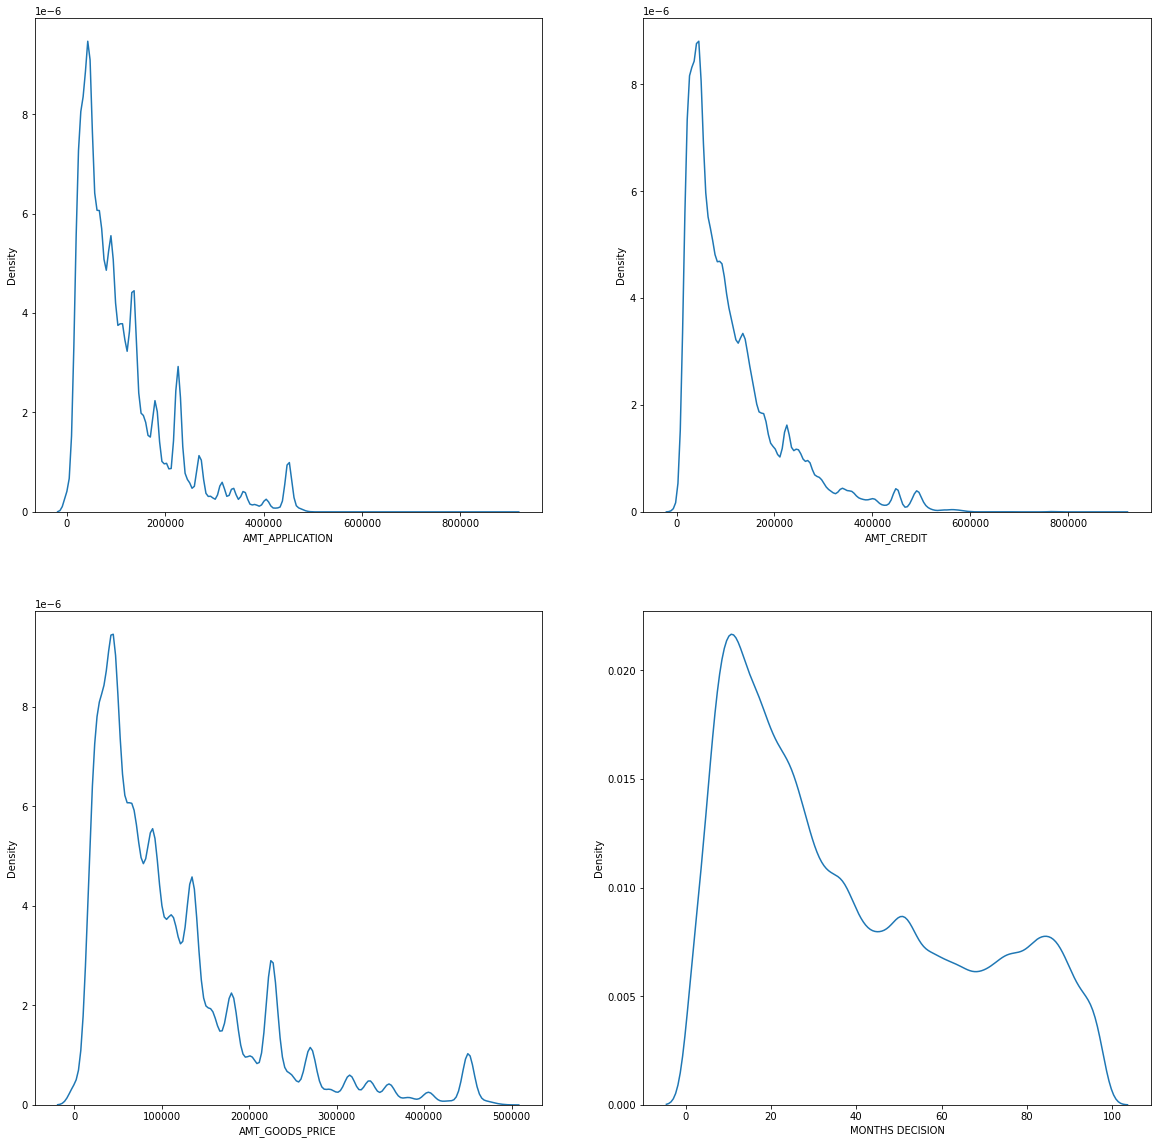

In [120]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

Inference:
- Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
- Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots.
- Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.
- Most of the applications decision took around 10 to 30 months.

In [121]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_BIRTH']]

subset.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_BIRTH
0,1730.430,17145.0,17145.0,17145.0,3,12.0,40.0
2,31924.395,337500.0,404055.0,337500.0,27,24.0,28.0
3,23703.930,315000.0,340573.5,315000.0,23,18.0,58.0
4,13832.775,211500.0,246397.5,211500.0,28,30.0,64.0
5,12165.210,148500.0,174361.5,148500.0,29,24.0,55.0


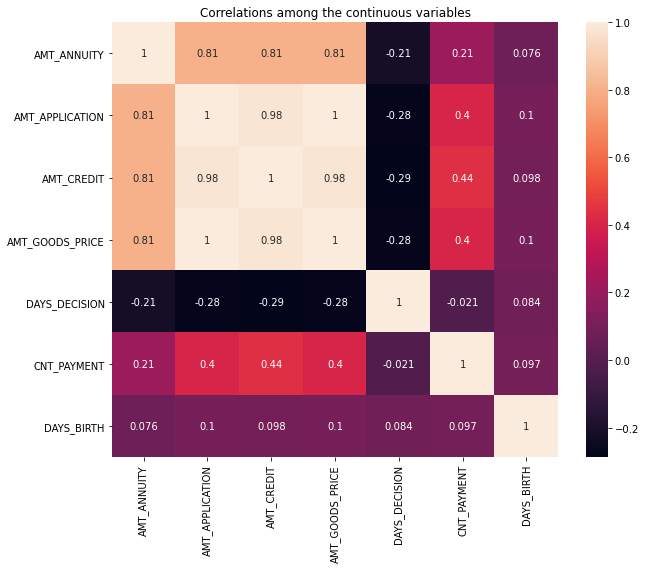

In [122]:
plt.figure(figsize = (10,8))
cor = subset.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlations among the continuous variables')
plt.show()

Inference: There in a strong correlations between below variables DAYS_BIRTH(AGE) is correlated with all the variables AMT_APPLICATION is correlated with AMT_ANNUTY, AMT_AMT_CREDIT, AMT_GOODS_PRICE



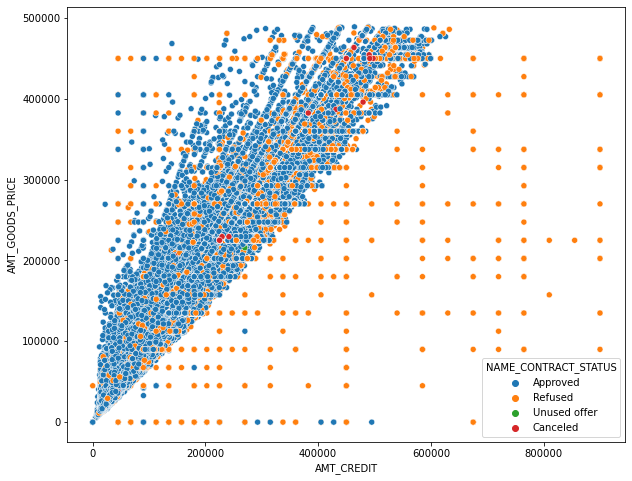

In [123]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

Inference: AMT_GOODS_PRICE and AMT_CREDIT are posotively correlated and mostly concentrated near the lower region. High AMT_CREDIT loans are most likely to be refused.

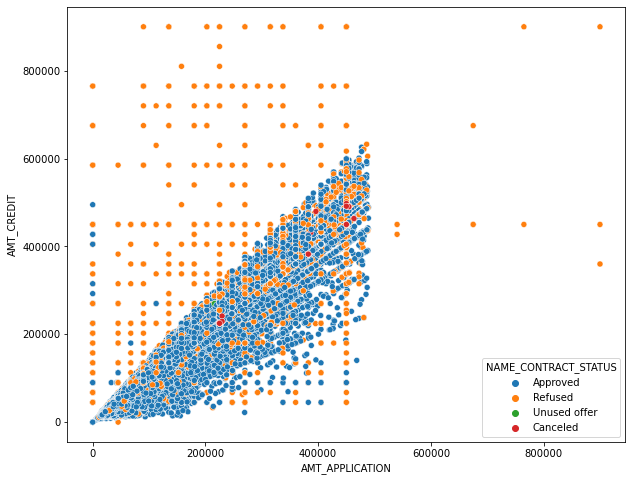

In [125]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

#### Bivariate Analysis

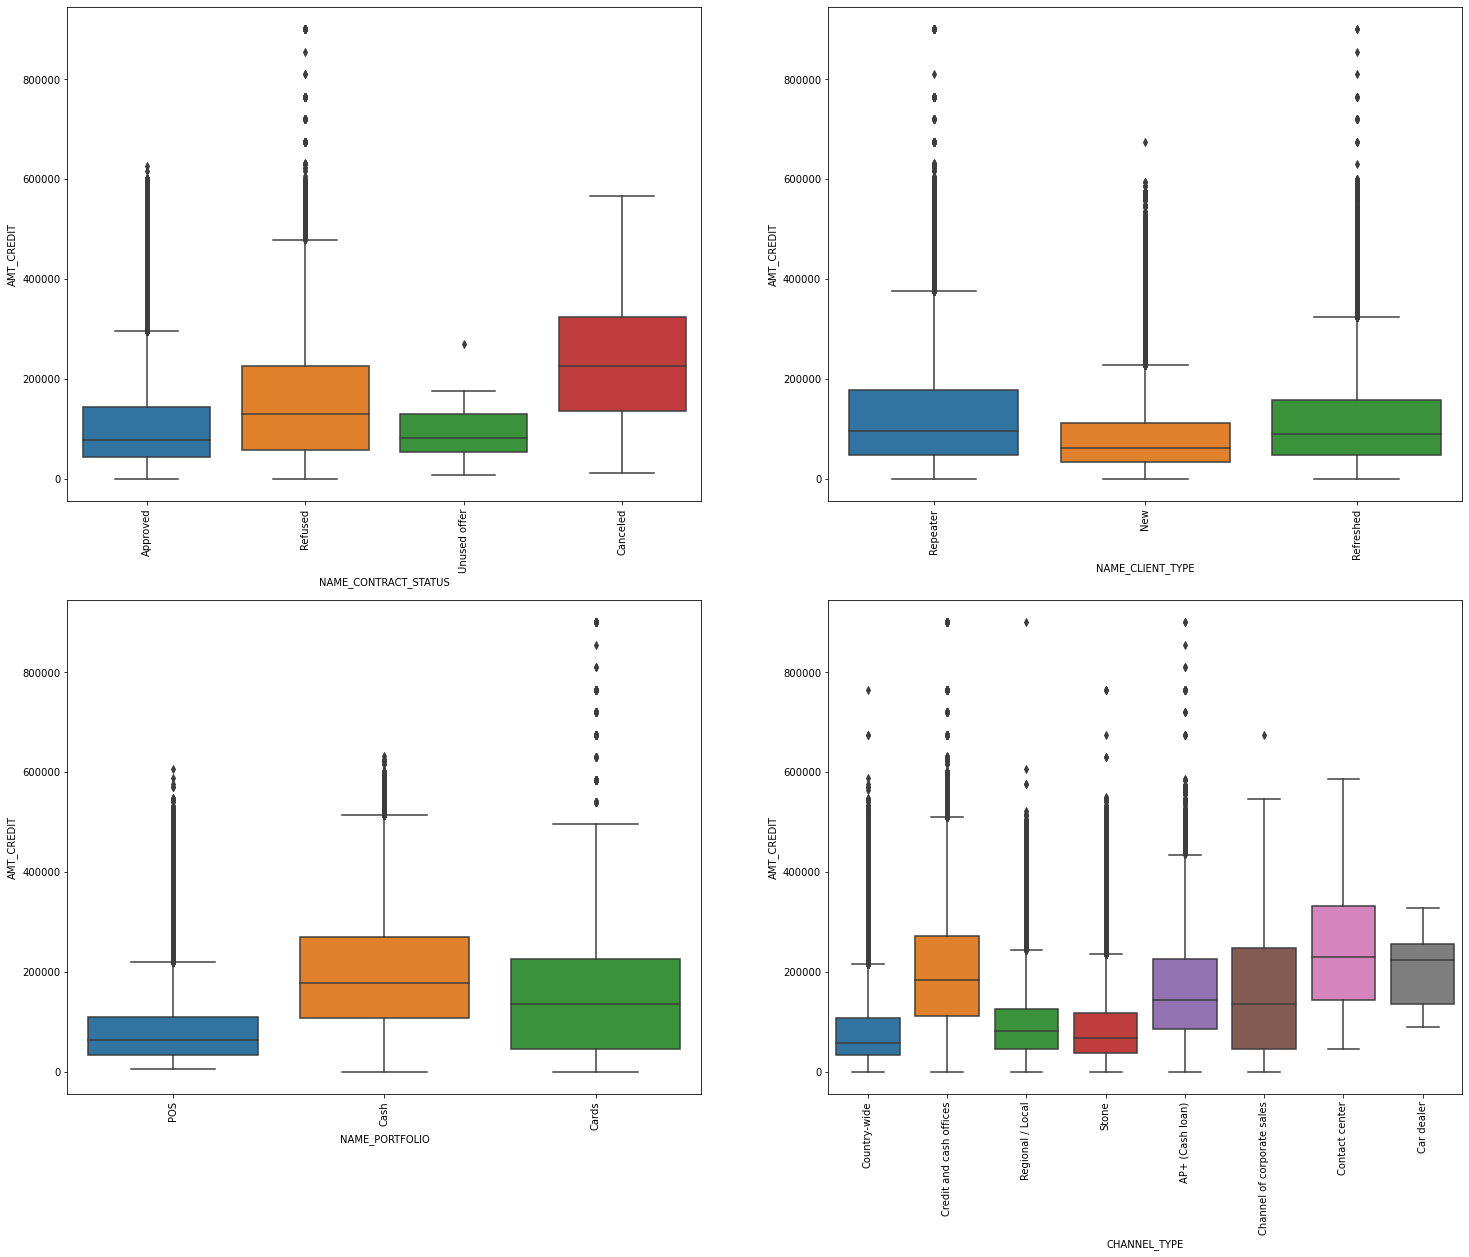

In [126]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

Inference:
- Most of the amount credit was cancelled in status
- Repeater client got more loan credit
- Cash loan got more credited.
- Through the contact center channel, more loan got credited.

## Segmented univariate analysis


In [127]:
print(round(application_df['AMT_GOODS_PRICE'].describe(), 3))
q50 = application_df['AMT_GOODS_PRICE'].quantile(0.5)
q75 = application_df['AMT_GOODS_PRICE'].quantile(0.75)

# creating Credit amount groups
def goodsprice_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['GOODSPRICE_CATEGORY'] = application_df['AMT_GOODS_PRICE'].apply(goodsprice_category)


count     238066.000
mean      477316.359
std       285050.203
min        40500.000
25%       229500.000
50%       450000.000
75%       675000.000
max      1341000.000
Name: AMT_GOODS_PRICE, dtype: float64


In [128]:
pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts())


TARGET
INCOME_CATEGORY GOODSPRICE_CATEGORY TARGET        
High            High                0        26029
                                    1         1669
                Low                 0        32408
                                    1         3324
                Medium              0        21240
                                    1         1767
Low             High                0         8164
                                    1          496
                Low                 0        52361
                                    1         4861
                Medium              0        15518
                                    1         1186
Medium          High                0        13322
                                    1          901
                Low                 0        34607
                                    1         3658
                Medium              0        15323
                                    1         1232

In [129]:
# target
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_priceinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','GOODSPRICE_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_priceinc.drop(0, axis = 1, inplace = True)

target_by_priceinc1 = pd.pivot_table(target_by_priceinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['GOODSPRICE_CATEGORY'], aggfunc = np.sum) 

target_by_priceinc1

GOODSPRICE_CATEGORY,High,Low,Medium
INCOME_CATEGORY,,,
High,0.060257,0.093026,0.076803
Low,0.057275,0.084950,0.071001
Medium,0.063348,0.095596,0.074419


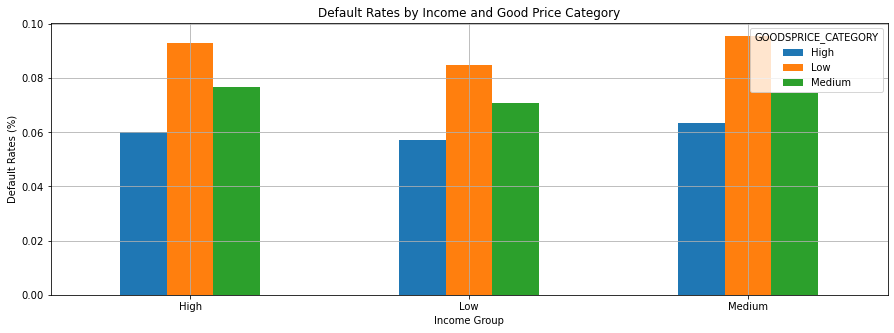

In [130]:
# figure
ax = target_by_priceinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Good Price Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

Inference: From the above analysis, we find that irrespective of the income groups, the lowest price of the good has the highest chances of default.Interestingly, the highest price category of goods has the lowest probability of default for all the income groups.

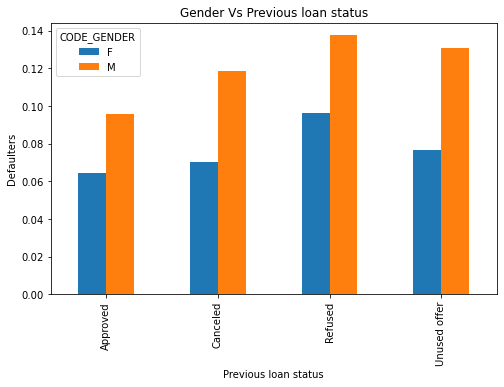

In [131]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()

Inference: Male clients are more defaulted than female client. Also, previously refused customer are more defaulted in current application.



### Client Type Vs Previous loan status plot



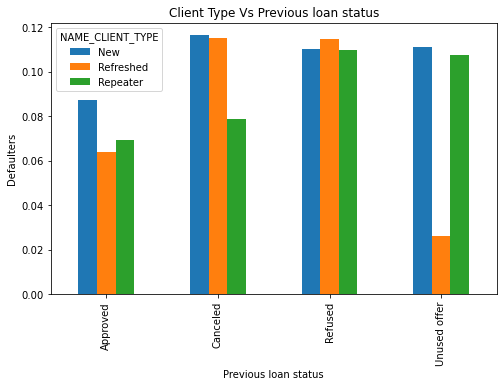

In [132]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Client Type Vs Previous loan status')
plt.show()

Inference: Repeat Clients are less likely to be defaulters

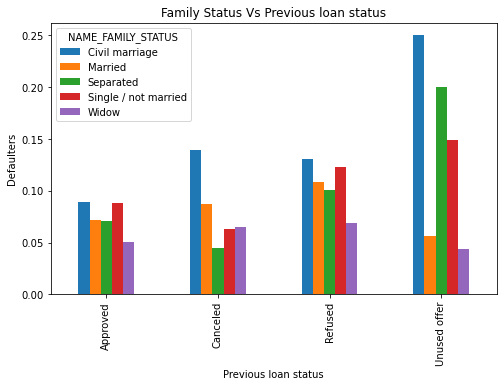

In [133]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

### Educatuion status Vs Previous loan status



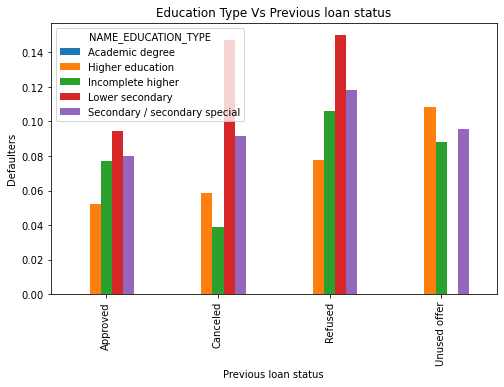

In [134]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

Inference: Previously refused people with lower secondary education are more defaulted in current application.

